# Données expérimentale d'abondance peptides

Ce notebook à pour objectif d'analyser l'abondance de peptides expérimental par rapport à la loi de Benford. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pybenford as ben

## Importation et exploration des données 

In [2]:
data = pd.read_excel("2111002_Qex.xls", skiprows=2)
data.shape

(19344, 25)

In [3]:
data.head()

,Retention time (min),Charge,m/z,Measured mass,Mass error (ppm),Score,Sequence,Modifications,Accession,Description,...,2111002_F1,2111002_F3,2111002_F5,2111002_F7,2111002_F9,2111002_F2,2111002_F4,2111002_F6,2111002_F8,2111002_F10
0,48.677067,3,559.951431,1676.832463,-12.784131,22.28,VVSNTIEPLTLFHK,[10] T(+79.97),Q9QYR6|MAP1A_MOUSE,Microtubule-associated protein 1A OS=Mus muscu...,...,6.776384e+07,9.436869e+07,4.922034e+07,5.412257e+07,5.957105e+07,3.774195e+07,7.037202e+07,4.937973e+07,4.669796e+07,6.104738e+07
1,48.636217,2,839.421883,1676.829213,-14.722003,24.17,VVSNTIEPLTLFHK,[10] T(+79.97),Q9QYR6|MAP1A_MOUSE,Microtubule-associated protein 1A OS=Mus muscu...,...,3.360170e+07,5.900628e+07,3.532774e+07,4.559151e+07,3.228971e+07,2.242276e+07,4.659886e+07,4.393899e+07,2.888520e+07,3.217825e+07
2,39.175683,3,607.612578,1819.815904,0.991523,55.48,ETSPTRGEPVPAWEGK,[3] S(+79.97),Q9QYR6|MAP1A_MOUSE,Microtubule-associated protein 1A OS=Mus muscu...,...,1.120705e+07,9.781480e+06,1.380008e+07,9.487215e+06,9.607149e+06,6.622668e+06,7.566239e+06,1.207472e+07,1.081931e+07,1.135872e+07
3,39.175683,2,910.914831,1819.815110,0.554751,57.56,ETSPTRGEPVPAWEGK,[3] S(+79.97),Q9QYR6|MAP1A_MOUSE,Microtubule-associated protein 1A OS=Mus muscu...,...,6.523238e+06,7.331441e+06,1.033460e+07,7.786583e+06,5.532342e+06,4.236554e+06,5.267715e+06,1.109310e+07,7.270405e+06,6.576651e+06
4,39.175683,3,607.612578,1819.815904,0.991523,38.2,ETSPTRGEPVPAWEGK,[2] T(+79.97),Q9QYR6|MAP1A_MOUSE,Microtubule-associated protein 1A OS=Mus muscu...,...,1.120705e+07,9.781480e+06,1.380008e+07,9.487215e+06,9.607149e+06,6.622668e+06,7.566239e+06,1.207472e+07,1.081931e+07,1.135872e+07


In [4]:
data.columns

Index(['Retention time (min)', 'Charge', 'm/z', 'Measured mass',
       'Mass error (ppm)', 'Score', 'Sequence', 'Modifications', 'Accession',
       'Description', 'Max fold change', 'Highest mean condition',
       'Lowest mean condition', 'Anova', 'Maximum CV', '2111002_F1',
       '2111002_F3', '2111002_F5', '2111002_F7', '2111002_F9', '2111002_F2',
       '2111002_F4', '2111002_F6', '2111002_F8', '2111002_F10'],
      dtype='object')

In [5]:
col_abundance = ['2111002_F1', '2111002_F3', '2111002_F5', '2111002_F7',
             '2111002_F9', '2111002_F2', '2111002_F4', '2111002_F6',
             '2111002_F8', '2111002_F10']
abundance = data[col_abundance]
print(abundance.shape)

(19344, 10)


In [6]:
abundance.head()

,2111002_F1,2111002_F3,2111002_F5,2111002_F7,2111002_F9,2111002_F2,2111002_F4,2111002_F6,2111002_F8,2111002_F10
0,6.776384e+07,9.436869e+07,4.922034e+07,5.412257e+07,5.957105e+07,3.774195e+07,7.037202e+07,4.937973e+07,4.669796e+07,6.104738e+07
1,3.360170e+07,5.900628e+07,3.532774e+07,4.559151e+07,3.228971e+07,2.242276e+07,4.659886e+07,4.393899e+07,2.888520e+07,3.217825e+07
2,1.120705e+07,9.781480e+06,1.380008e+07,9.487215e+06,9.607149e+06,6.622668e+06,7.566239e+06,1.207472e+07,1.081931e+07,1.135872e+07
3,6.523238e+06,7.331441e+06,1.033460e+07,7.786583e+06,5.532342e+06,4.236554e+06,5.267715e+06,1.109310e+07,7.270405e+06,6.576651e+06
4,1.120705e+07,9.781480e+06,1.380008e+07,9.487215e+06,9.607149e+06,6.622668e+06,7.566239e+06,1.207472e+07,1.081931e+07,1.135872e+07


In [7]:
# one dimension array
abundance = abundance.values.reshape(abundance.shape[0] * abundance.shape[1])
print(abundance.shape)
abundance

(193440,)


array([6.77638430e+07, 9.43686874e+07, 4.92203420e+07, ...,
       2.85824333e+04, 3.10497668e+04, 7.08072745e+03])

In [8]:
# remove 0
abundance = abundance[abundance > 0]
print(abundance.shape)
abundance

(188630,)


array([6.77638430e+07, 9.43686874e+07, 4.92203420e+07, ...,
       2.85824333e+04, 3.10497668e+04, 7.08072745e+03])

### histogramme de la distribution des données d'abondance

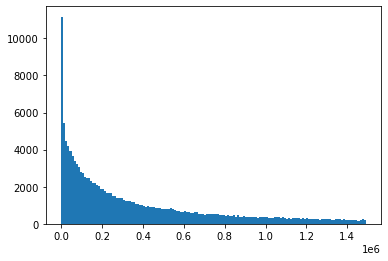

In [9]:
plt.hist(abundance, bins=range(0, 1_500_000, 10_000));

## Analyse du premier digit par raport à la loi de Benford

In [10]:
freq_ben = ben.get_theoretical_freq_benford()
first_digit = ben.count_first_digit(abundance)
freq_first_digit = ben.normalize_first_digit(first_digit)

print(f"First digit : {first_digit}")
print(f"observed proportion : {freq_first_digit}")
print(f"theoretical proportion : {freq_ben}")

First digit : [57481 32845 23304 18042 15065 12839 10938  9651  8393]
observed proportion : [0.30484519 0.17419043 0.12359062 0.09568409 0.07989584 0.06809045
 0.05800868 0.05118319 0.0445115 ]
theoretical proportion : [0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


### histogramme de la fréquence observée et de la fréquence théorique des premier digit

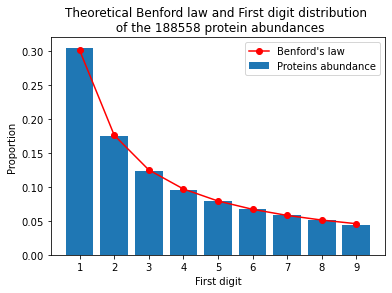

In [11]:
ben.build_hist_freq_ben(freq_first_digit, freq_ben, 1,
                        title="Theoretical Benford law and First digit "
                        f"distribution \n of the {sum(first_digit)} "
                        "protein abundances", legend="Proteins abundance")

#### histogramme des fréquences cummulées

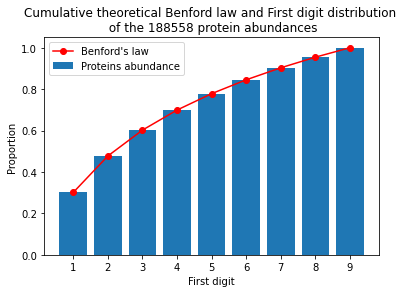

In [12]:
nb_digit = 1
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(freq_ben)+1), np.cumsum(freq_ben), marker="o",
               color="red")
plt.bar(range(1, len(freq_first_digit)+1), np.cumsum(freq_first_digit))
         
lab = []
for i in range((10 ** (nb_digit-1)), (10 ** nb_digit)):
    lab.append(str(i))

plt.xticks(ticks=range(1, len(freq_ben)+1), labels=lab)
plt.title(label="Cumulative theoretical Benford law and First digit "
                f"distribution \n of the {sum(first_digit)} "
                "protein abundances")
plt.xlabel("First digit")
plt.ylabel("Proportion")
plt.legend(labels=("Benford's law", "Proteins abundance"));

### Tests statistiques

In [13]:
ben.calculate_bootstrap_chi2(abundance, freq_ben, 1)

statistics : 7.796321096007251 ; p-value : 0.45361495242143657


(7.796321096007251, 0.45361495242143657)

In [14]:
ben.calculate_bootstrap_ks(abundance, freq_ben, 1)

Comform to Benford law, for alpha risk = 5%



(0.02080694150428224, 0.04300697617828996)

### Résultats

Graphiquement on remarque que les données d'abondance de peptides suivent la loi de benford pour le premier digit. Ce que confirme le test statisique de bootstrap du $\chi^2$ et le test de bootstrap de K-S.  

On obtient une p-value de 0.454, ce qui est supérieur à 5%, on ne rejette donc pas $H_0$ et au risque alpha de 5% les données d'abondance de peptides suivent la loi de Benford pour le premier digit. Avec le test de bootstrap de K-S on obtient un K-S de 0.021, ce qui est inférieur à la valeur critique de 0.043. On peut donc en conclure egalement, qu'au risque alpha de 5% les données d'abondance de peptides suivent la loi de Benford pour le premier digit.  

## Analyse des deux premiers digit par rapport à la loi de Benford

In [15]:
freq_ben2 = ben.get_theoretical_freq_benford(2)
first_digit2 = ben.count_first_digit(abundance, 2)
freq_first_digit2 = ben.normalize_first_digit(first_digit2)

print(f"First digit : {first_digit2}")
print(f"observed proportion : {freq_first_digit2}")
print(f"theoretical proportion : {freq_ben2}")

First digit : [7847 6969 6510 6329 5733 5412 4904 4895 4673 4176 4183 3701 3517 3415
 3340 3060 3088 2863 2918 2739 2630 2551 2460 2478 2391 2361 2236 2098
 2121 1958 1944 1999 1899 1869 1769 1770 1753 1765 1701 1561 1663 1566
 1594 1643 1549 1469 1366 1507 1352 1344 1410 1324 1379 1288 1243 1268
 1317 1221 1197 1170 1157 1119 1131 1095 1146 1087 1062 1080 1026 1022
  945 1021  939  954  944  989 1014  940  973  920  867  844  891  787
  897  869  752  839  818  813]
observed proportion : [0.04165141 0.03699103 0.03455469 0.03359395 0.03043042 0.02872657
 0.02603014 0.02598237 0.024804   0.02216596 0.02220311 0.01964469
 0.01866803 0.01812662 0.01772852 0.0162423  0.01639092 0.01519663
 0.01548857 0.01453845 0.01395988 0.01354056 0.01305753 0.01315308
 0.01269128 0.01253205 0.01186855 0.01113606 0.01125814 0.01039295
 0.01031864 0.01061057 0.01007978 0.00992054 0.00938975 0.00939505
 0.00930482 0.00936851 0.00902881 0.00828569 0.0088271  0.00831223
 0.00846086 0.00872095 0.008222   0.0

### histogramme de la fréquence observée et de la fréquence théorique des premier digit

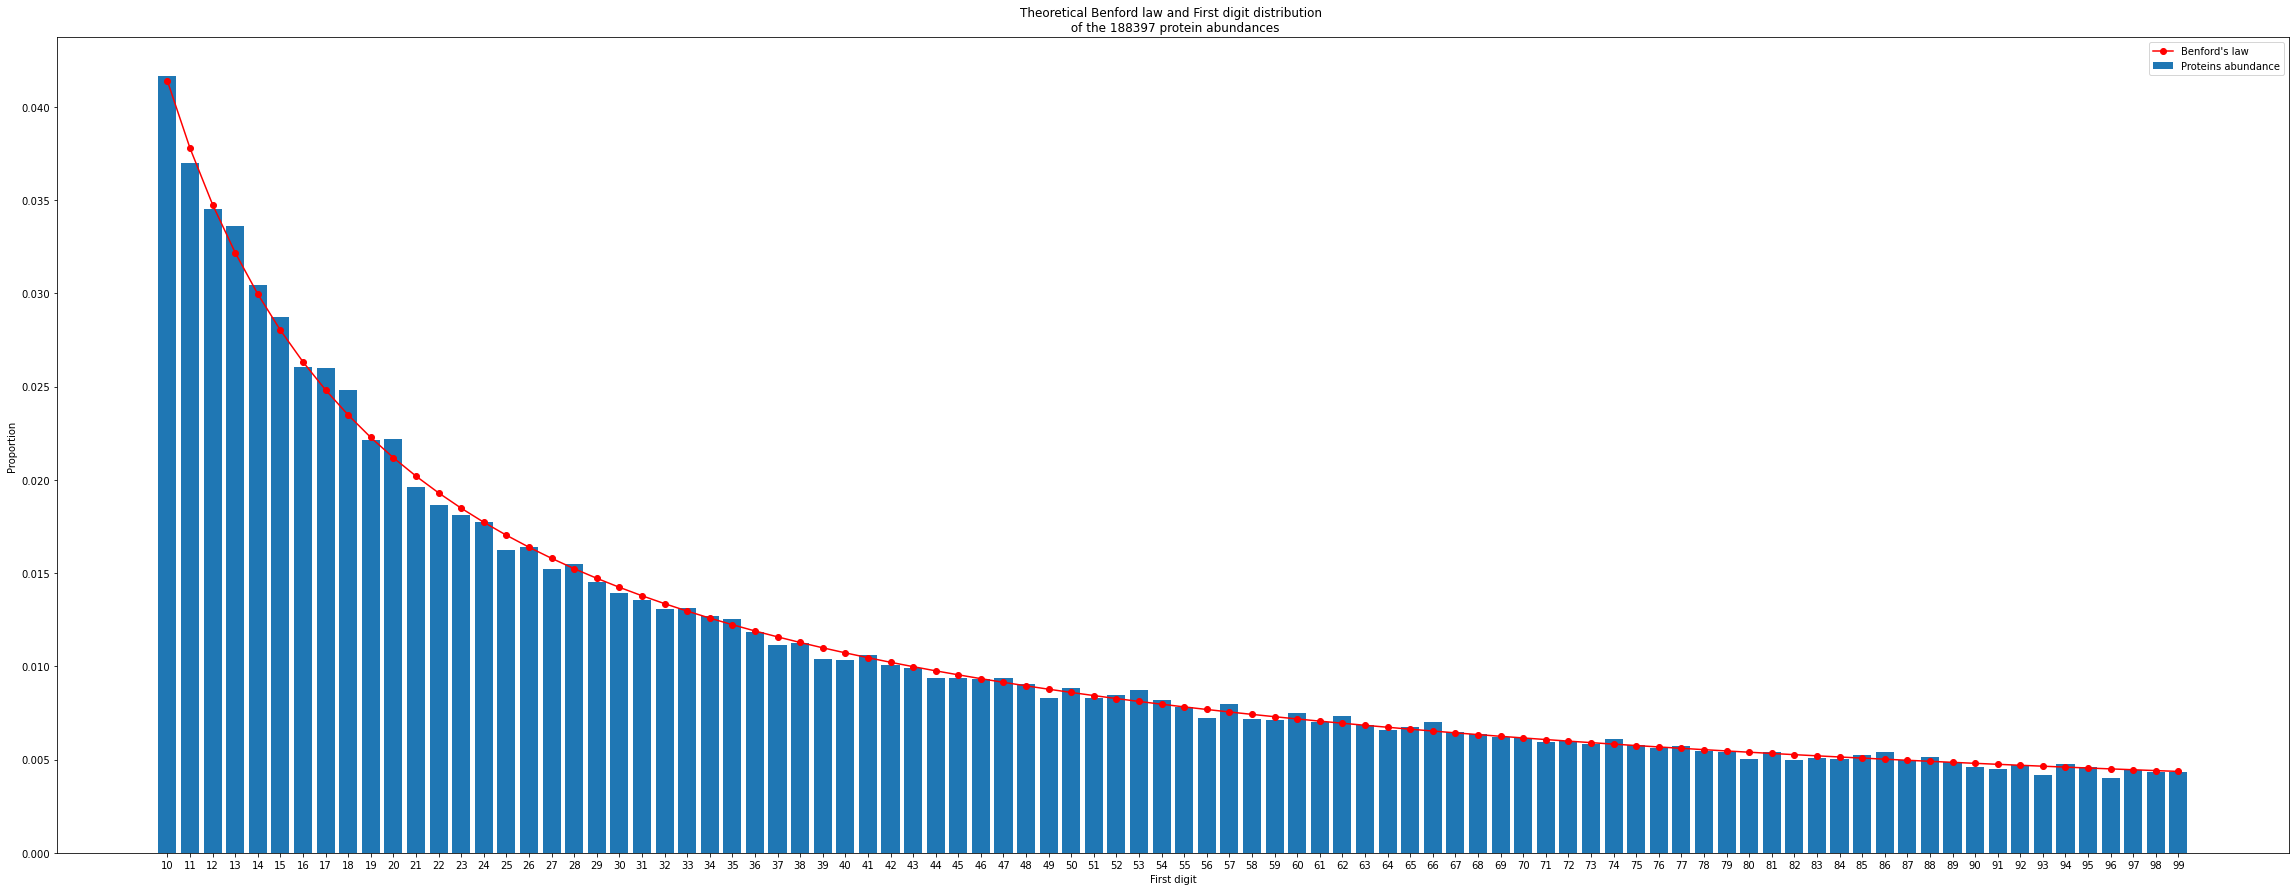

In [16]:
ben.build_hist_freq_ben(freq_first_digit2, freq_ben2, 2, size=(40, 15),
                        title="Theoretical Benford law and First digit "
                        f"distribution \n of the {sum(first_digit2)} "
                        "protein abundances", legend="Proteins abundance")

#### histogramme des fréquences cummulées

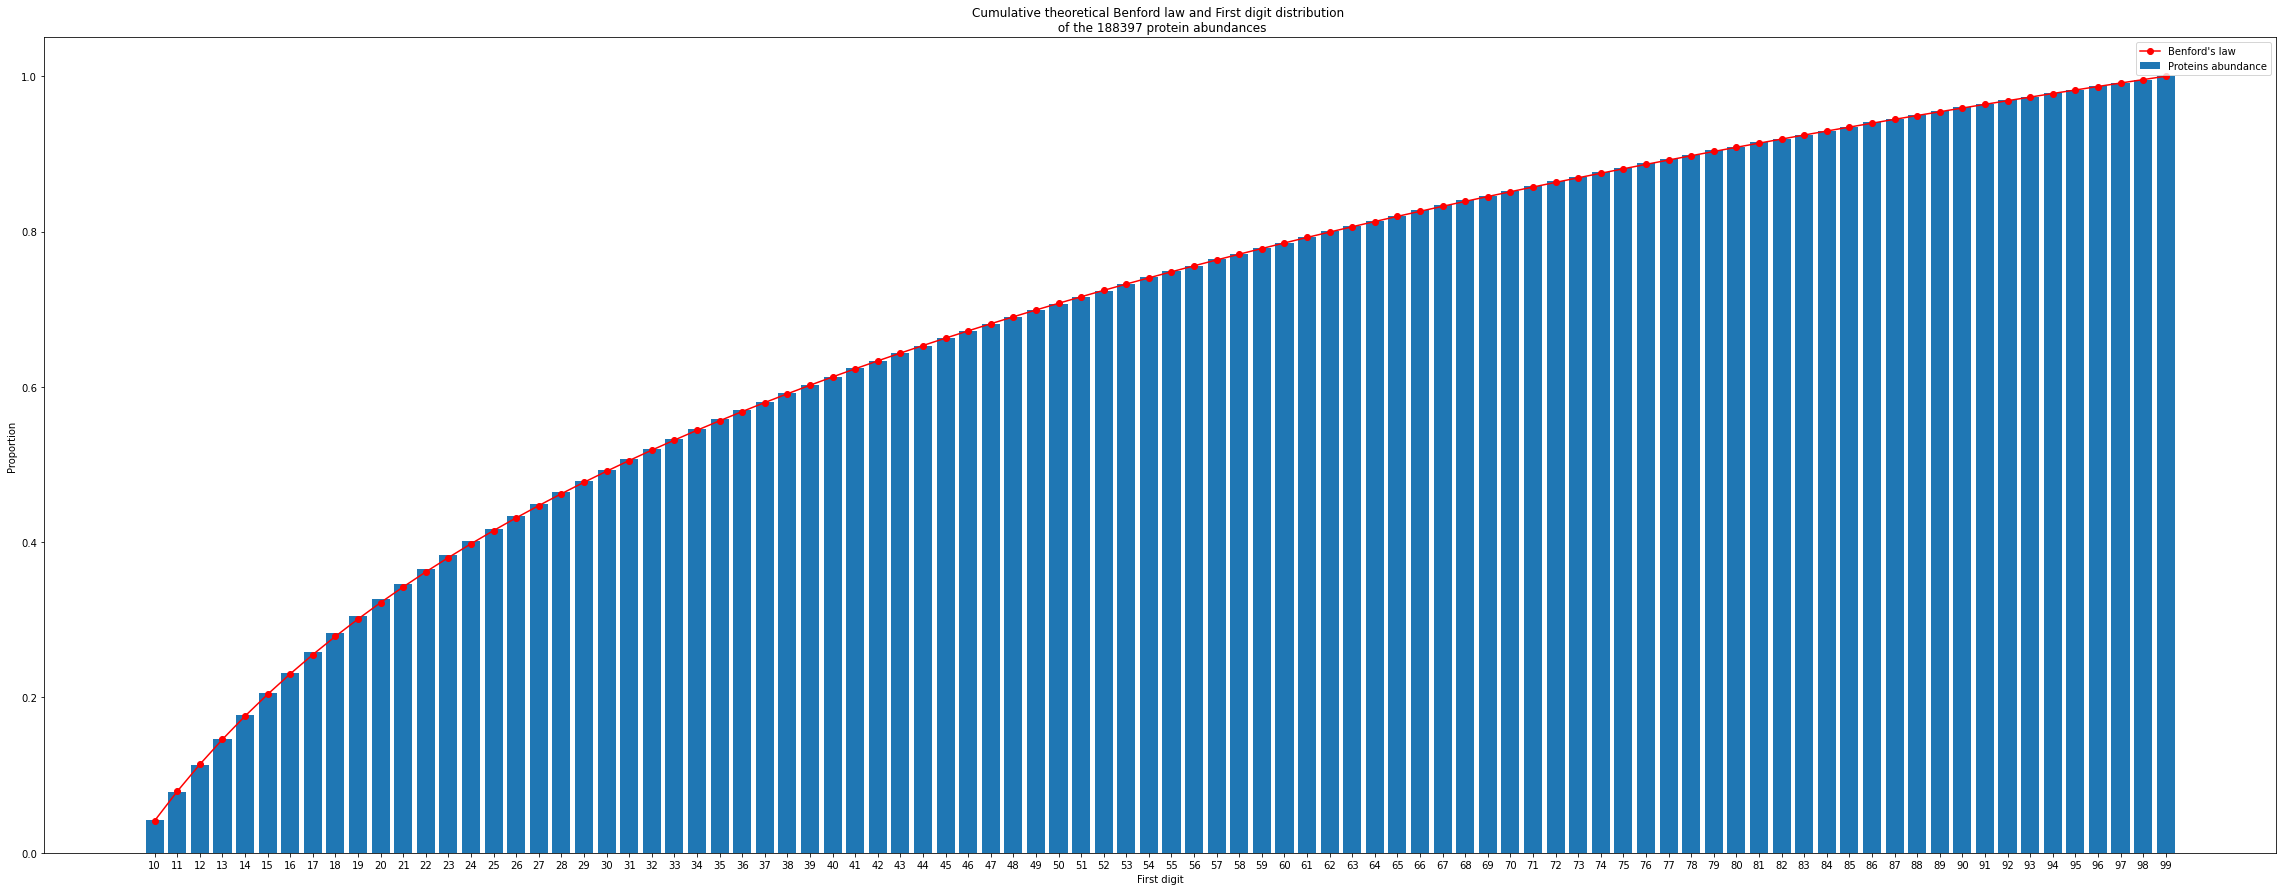

In [17]:
nb_digit = 2
plt.figure(figsize=(40, 15))
plt.plot(range(1, len(freq_ben2)+1), np.cumsum(freq_ben2), marker="o",
               color="red")
plt.bar(range(1, len(freq_first_digit2)+1), np.cumsum(freq_first_digit2))
         
lab = []
for i in range((10 ** (nb_digit-1)), (10 ** nb_digit)):
    lab.append(str(i))

plt.xticks(ticks=range(1, len(freq_ben2)+1), labels=lab)
plt.title(label="Cumulative theoretical Benford law and First digit "
                f"distribution \n of the {sum(first_digit2)} "
                "protein abundances")
plt.xlabel("First digit")
plt.ylabel("Proportion")
plt.legend(labels=("Benford's law", "Proteins abundance"));

### Tests statistiques

In [18]:
ben.calculate_bootstrap_chi2(abundance, freq_ben2, 2)

statistics : 88.99555174790936 ; p-value : 0.4801957438406908


(88.99555174790936, 0.4801957438406908)

In [19]:
ben.calculate_bootstrap_ks(abundance, freq_ben2, 2)

Comform to Benford law, for alpha risk = 5%



(0.025683641345589932, 0.04300697617828996)

### Résultats

Graphiquement on remarque que les données d'abondance de peptides suivent la loi de benford pour les deux premiers digit. Ce que confirme le test statisique de bootstrap du $\chi^2$ et le test de bootstrap de K-S.  

On obtient une p-value de 0.48, ce qui est supérieur à 5%, on ne rejette donc pas $H_0$ et au risque alpha de 5% les données d'abondance de peptides suivent la loi de Benford pour les deux premiers digit. Avec le test de bootstrap de K-S on obtient un K-S de 0.026, ce qui est inférieur à la valeur critique de 0.043. On peut donc en conclure egalement, qu'au risque alpha de 5% les données d'abondance de peptides suivent la loi de Benford pour les deux premiers digit.  

# Conclusion

Les données d'abondance de peptides total suivent la loi de Benford.  

# Analyse de l'abondance des peptides pour chacun des échantillons par rapport à la loi de Benford

Result of 2111002_F1 sample
Results of bootstrap chisquare test : 
statistics : 8.516632062359367 ; p-value : 0.38469574018511943
Results of bootstrap K-S test : 
Comform to Benford law, for alpha risk = 5%



Result of 2111002_F3 sample
Results of bootstrap chisquare test : 
statistics : 8.11711527082226 ; p-value : 0.42211443713625846
Results of bootstrap K-S test : 
Comform to Benford law, for alpha risk = 5%



Result of 2111002_F5 sample
Results of bootstrap chisquare test : 
statistics : 8.611116303039799 ; p-value : 0.37615541633171556
Results of bootstrap K-S test : 
Comform to Benford law, for alpha risk = 5%



Result of 2111002_F7 sample
Results of bootstrap chisquare test : 
statistics : 7.87192872081851 ; p-value : 0.4460795996467227
Results of bootstrap K-S test : 
Comform to Benford law, for alpha risk = 5%



Result of 2111002_F9 sample
Results of bootstrap chisquare test : 
statistics : 8.46497406960165 ; p-value : 0.3894159050560137
Results of bootstrap K-S test : 
Co

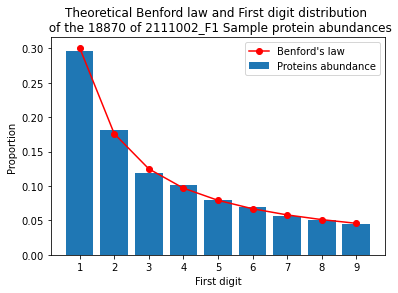

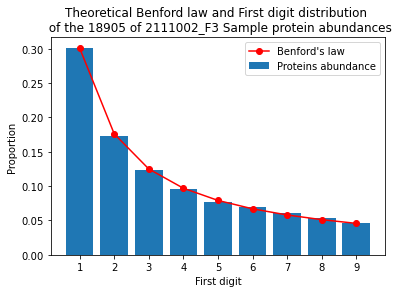

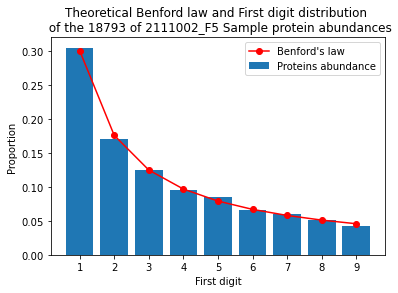

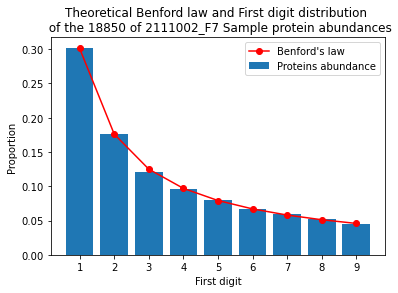

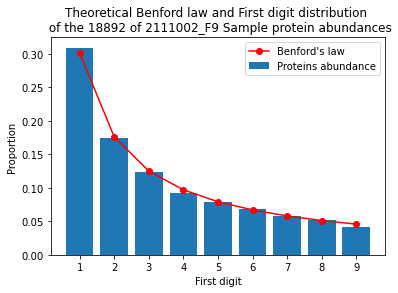

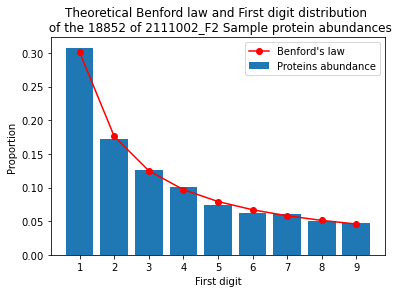

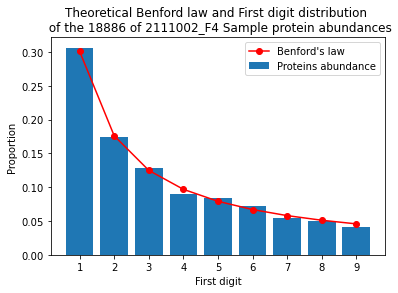

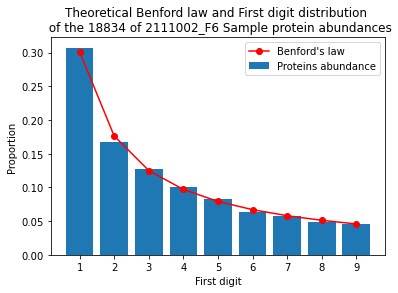

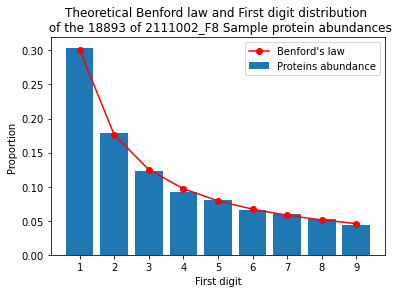

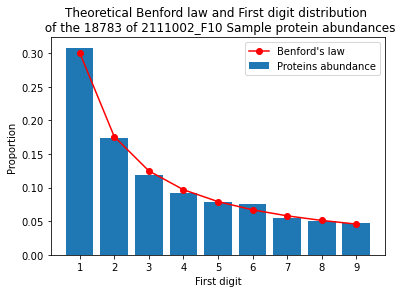

In [20]:
for id_sample in col_abundance:
    sample = data[id_sample]
    # Remove 0
    sample = sample[sample > 0]
    # sample in array
    sample = np.array(sample)
    # Count first digit in sample
    sample_digit = ben.count_first_digit(sample)
    # Calculate first digit proportion in sample
    freq_sample_digit = ben.normalize_first_digit(sample_digit)
    # Build histogram of observed and thereotical proportion
    ben.build_hist_freq_ben(freq_sample_digit, freq_ben, 1,
                        title="Theoretical Benford law and First digit "
                        f"distribution \n of the {sum(sample_digit)} "
                        f"of {id_sample} Sample "
                        "protein abundances", legend="Proteins abundance")
    # Chisquare test
    print(f"Result of {id_sample} sample")
    print("Results of bootstrap chisquare test : ")
    ben.calculate_bootstrap_chi2(sample, freq_ben, 1)
    # K-s test
    print("Results of bootstrap K-S test : ")
    ben.calculate_bootstrap_ks(sample, freq_ben, 1)
    print("\n")

## Résultats
L'abondance des peptides pour chacun des 10 échantillons suit la loi de Benford, pour un risque alpha de 5%.

# Abondance de protéines et loi de Benford (moyenne de l'abandance des peptides)

## Calcul de l'abondance total (tous échantillons confondus) par protéine

Le calcul de l'abondance des protéines est effectuée en réalisant la moyenne de l'abondance de tous les peptides associés à une même protéine.

In [21]:
# groupe by Accession and mean per groupe
data2 = data.groupby(["Accession"]).mean()
data2

,Retention time (min),Charge,m/z,Measured mass,Mass error (ppm),Max fold change,Anova,Maximum CV,2111002_F1,2111002_F3,2111002_F5,2111002_F7,2111002_F9,2111002_F2,2111002_F4,2111002_F6,2111002_F8,2111002_F10
Accession,,,,,,,,,,,,,,,,,,
A0A087WPF7|AUTS2_MOUSE,70.752967,3.000000,831.107710,2490.301302,0.683486,1.000873,0.698588,113.004809,1.385283e+05,2.207243e+05,5.311465e+03,32280.941424,17071.146844,1.616764e+04,1.863807e+05,1.215805e+05,7.167140e+04,1.847755e+04
A2A432|CUL4B_MOUSE,67.862000,3.000000,913.762911,2738.266904,1.717971,1.067203,0.811456,31.238364,4.055628e+05,3.213562e+05,2.768136e+05,276803.564552,317026.722924,2.672048e+05,4.704797e+05,4.436626e+05,2.683055e+05,2.552706e+05
A2A5R2|BIG2_MOUSE,36.591034,3.611111,772.444329,2750.894381,1.082670,1.377063,0.579071,50.015042,3.684306e+05,4.452482e+05,3.572898e+05,372757.932939,376148.384723,3.140250e+05,2.665494e+05,3.780755e+05,3.693754e+05,3.850299e+05
A2A690|TANC2_MOUSE,42.774046,2.666667,687.494133,1779.527201,1.197708,1.519608,0.411453,49.570041,4.180635e+05,3.705874e+05,3.757427e+05,327303.815777,301433.298246,3.136308e+05,3.440271e+05,4.004651e+05,3.874544e+05,3.291789e+05
A2A699|F1712_MOUSE,75.762765,3.500000,858.049639,2844.529104,0.659563,1.536109,0.516506,66.543832,1.560133e+06,7.508872e+05,1.255769e+06,847570.543944,822401.618836,1.030359e+06,1.251557e+06,1.434233e+06,1.049174e+06,9.533355e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Z2V6|HDAC5_MOUSE,36.601625,3.000000,798.178764,2391.514464,0.703007,1.045348,0.621967,47.210369,8.885616e+04,1.028554e+05,1.104514e+05,99478.267886,110159.845796,1.001507e+05,6.561472e+04,1.204192e+05,8.861326e+04,1.332362e+05
Q9Z2W0|DNPEP_MOUSE,98.101367,4.000000,1148.316677,4589.237602,1.133523,1.080759,0.458349,194.121523,1.634419e+05,2.958111e+04,3.746832e+04,51456.045423,802455.714858,9.470436e+04,5.719774e+03,1.045713e+06,1.311432e+04,1.272657e+04
Q9Z2Y3|HOME1_MOUSE,70.390057,3.600000,1111.755668,4088.213466,0.687351,2.128649,0.434509,62.762406,5.840655e+05,1.137557e+06,8.447269e+05,997674.019588,605671.541253,3.572469e+05,5.018501e+05,5.085526e+05,1.236630e+06,1.032713e+06


In [22]:
sample = data2[col_abundance]
print(sample.shape)
# one dimension array
sample = sample.values.reshape(sample.shape[0] * sample.shape[1])
print(sample.shape)
# Remove 0
sample = sample[sample > 0]
print(sample.shape)
sample = np.array(sample)
sample

(2265, 10)
(22650,)
(22543,)


array([138528.31284582, 220724.31089682,   5311.46489724, ...,
       166015.7613905 ,  88904.79733109,  93629.06457523])

In [23]:
sample_digit = ben.count_first_digit(sample)
freq_sample_digit = ben.normalize_first_digit(sample_digit)

print(f"First digit : {sample_digit}")
print(f"Observed proportion : {freq_sample_digit}")
print(f"Theoretical proportion : {freq_ben}")

First digit : [6490 3930 2936 2249 1846 1560 1295 1164 1073]
Observed proportion : [0.28789425 0.1743335  0.13023999 0.09976489 0.08188795 0.06920108
 0.05744577 0.05163465 0.04759792]
Theoretical proportion : [0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


### histogramme de la fréquence observée et de la fréquence théorique des premier digit

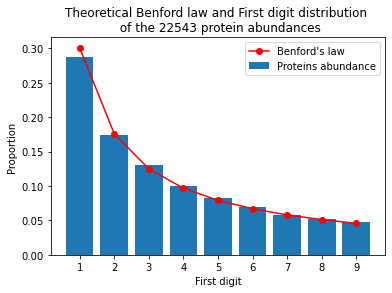

In [24]:
ben.build_hist_freq_ben(freq_sample_digit, freq_ben, 1,
                        title="Theoretical Benford law and First digit "
                        f"distribution \n of the {sum(sample_digit)} "
                        "protein abundances", legend="Proteins abundance")

#### histogramme des fréquences cummulées

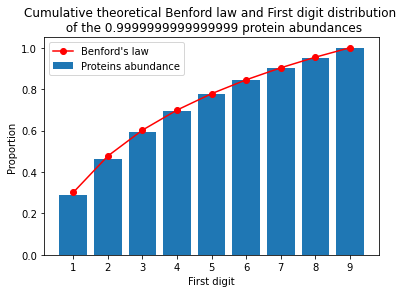

In [25]:
nb_digit = 1
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(freq_ben)+1), np.cumsum(freq_ben), marker="o",
               color="red")
plt.bar(range(1, len(freq_sample_digit)+1), np.cumsum(freq_sample_digit))
         
lab = []
for i in range((10 ** (nb_digit-1)), (10 ** nb_digit)):
    lab.append(str(i))

plt.xticks(ticks=range(1, len(freq_ben)+1), labels=lab)
plt.title(label="Cumulative theoretical Benford law and First digit "
                f"distribution \n of the {sum(freq_sample_digit)} "
                "protein abundances")
plt.xlabel("First digit")
plt.ylabel("Proportion")
plt.legend(labels=("Benford's law", "Proteins abundance"));

### Tests statistiques

In [26]:
ben.calculate_bootstrap_chi2(sample, freq_ben, 1)

statistics : 8.8767552179983 ; p-value : 0.35279927275022277


(8.8767552179983, 0.35279927275022277)

In [27]:
ben.calculate_bootstrap_ks(sample, freq_ben, 1)

Comform to Benford law, for alpha risk = 5%



(0.024427604263958506, 0.04300697617828996)

## Résultats

Graphiquement l'abondance de protéines de l'ensemble des échantillons semble suivre la loi de Benford. On obtient une p-value supérieur 5% pour le test du $\chi^2$ sans ou avec bootstrap. On obtient un K-S calculé inférieur à la valeur critique sans ou avec bootstrap.  

On peut donc conclure, pour un risque alpha de 5%, que l'abondance de protéines pour l'ensemble des échantilons suit la loi de Benford pour le premier digit.

## Analyse pour chacun des échantillons

Result of 2111002_F1 sample
Results of chisquare test : 
statistics : 3.449687324979664 ; p-value : 0.9030591419571047
Results of bootstrap chisquare test : 
statistics : 5.97132675736083 ; p-value : 0.6504438545735604
Results of K-S test : 
Comform to Benford law, for alpha risk = 5%

Results of bootstrap K-S test : 
Comform to Benford law, for alpha risk = 5%




Result of 2111002_F3 sample
Results of chisquare test : 
statistics : 8.186730958474488 ; p-value : 0.4154456621328691
Results of bootstrap chisquare test : 
statistics : 8.113937762298425 ; p-value : 0.42242028214495914
Results of K-S test : 
Comform to Benford law, for alpha risk = 5%

Results of bootstrap K-S test : 
Comform to Benford law, for alpha risk = 5%




Result of 2111002_F5 sample
Results of chisquare test : 
statistics : 12.288524555556307 ; p-value : 0.13878742668629868
Results of bootstrap chisquare test : 
statistics : 10.027613764468844 ; p-value : 0.26309313885391883
Results of K-S test : 
Comform to Benf

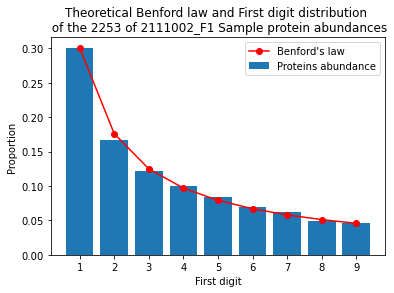

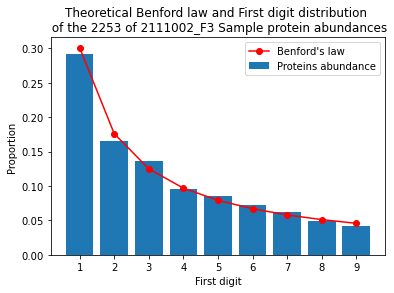

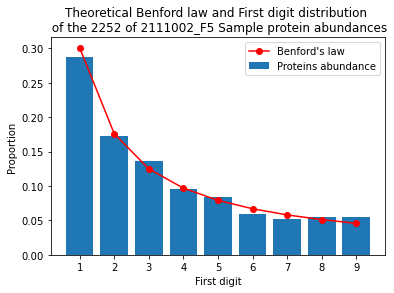

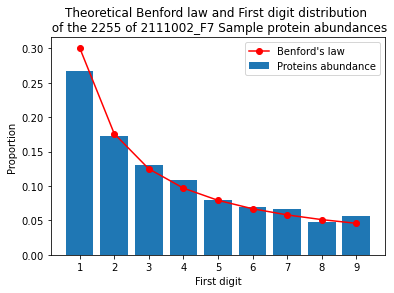

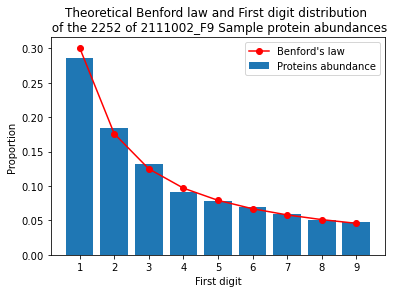

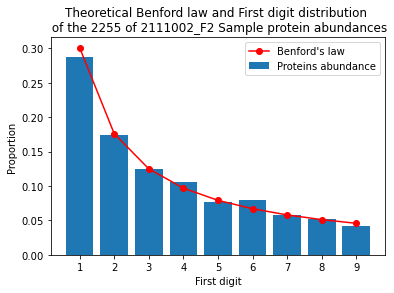

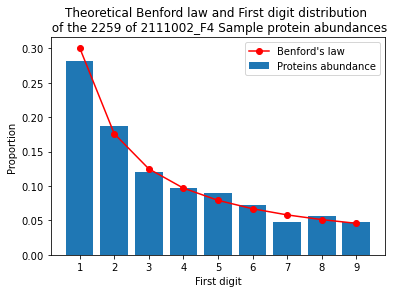

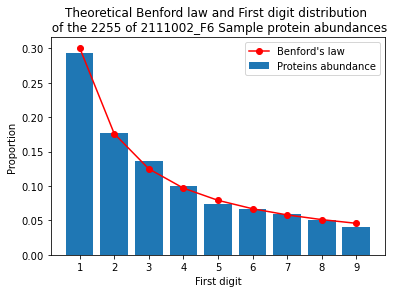

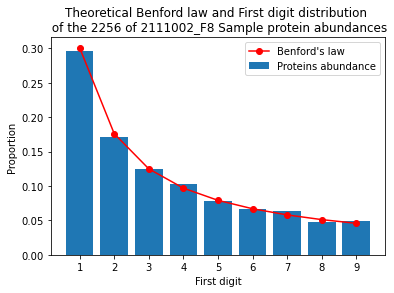

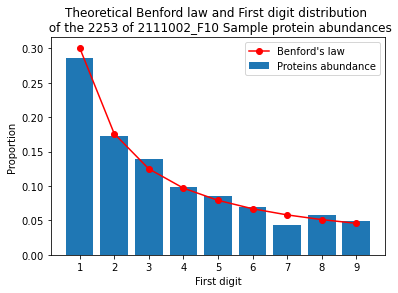

In [28]:
for id_sample in col_abundance:
    sample = data2[id_sample]
    # Remove 0
    sample = sample[sample > 0]
    # sample in array
    sample = np.array(sample)
    # Count first digit in sample
    sample_digit = ben.count_first_digit(sample)
    # Calculate first digit proportion in sample
    freq_sample_digit = ben.normalize_first_digit(sample_digit)
    # Build histogram of observed and thereotical proportion
    ben.build_hist_freq_ben(freq_sample_digit, freq_ben, 1,
                        title="Theoretical Benford law and First digit "
                        f"distribution \n of the {sum(sample_digit)} "
                        f"of {id_sample} Sample "
                        "protein abundances", legend="Proteins abundance")
    # Chisquare test
    print(f"Result of {id_sample} sample")
    print("Results of chisquare test : ")
    ben.chi2_test(sample, freq_ben, 1)
    print("Results of bootstrap chisquare test : ")
    ben.calculate_bootstrap_chi2(sample, freq_ben, 1)
    # K-s test
    print("Results of K-S test : ")
    ben.ks_test(freq_sample_digit, freq_ben, 1)
    print("Results of bootstrap K-S test : ")
    ben.calculate_bootstrap_ks(sample, freq_ben, 1)
    print("\n\n")

## Résultats
Graphiquement l'abondance de protéines pour chacun des échantillons semble suivre la loi de Benford. On obtient une p-value supérieur 5% pour le test du $\chi^2$ sans ou avec bootstrap. Hormis pour les échantillons F7 et F10, où le test de $\chi^2$ sans bootstrap est significatif (donc ne suit pa la loi de Benford).  
On obtient un K-S calculé inférieur à la valeur critique sans ou avec bootstrap.  

On peut donc conclure l'abondance de protéines suit la loi de benford pour le premier digit pour chacun des échantillon, hormis pour les échantillons F7 et F10 qui ne suivent pas la loi de Benford, pour un risque alpha de 5%.

# Abondance de protéines et loi de Benford (moyenne de l'abandance des n peptides les plus abondants)

## Calcul de l'abondance total (tous échantillons confondus) par protéine

Le calcul de l'abondance des protéines est effectuée en réalisant la moyenne de l'abondance des n peptides les plus abondants associés à une même protéine. ici on a choisi n = 3.

In [29]:
list_id_prot = set(data["Accession"])
len(list_id_prot)

2266

In [30]:
rows_prot = np.array(data['Accession'])
col_sample = np.array(data['2111002_F1'])
dict_prot = dict.fromkeys(list_id_prot, [])
print(len(rows_prot)); print(len(col_sample)); print(len(dict_prot))

19344
19344
2266


In [31]:
j = 0
for i in range(len(rows_prot)):
    dict_prot[rows_prot[i]].append(col_sample[i])
    j += 1

In [ ]:
dict_prot

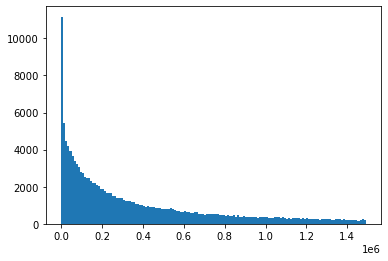

In [33]:
plt.hist(abundance, bins=range(0, 1_500_000, 10_000));

In [34]:
print(f"Mean : {np.mean(abundance)}")
print(f"Median : {np.median(abundance)}")
print(f"Variance : {np.var(abundance)}")
print(f"Standard deviation : {np.sqrt(np.var(abundance))}")

Mean : 2735270.2434324278
Median : 386521.48071731
Variance : 206070223106152.62
Standard deviation : 14355146.223781653


In [35]:
print(f"Mean : {np.log(np.mean(abundance))}")
print(f"Median : {np.log(np.median(abundance))}")
print(f"Variance : {np.log(np.var(abundance))}")
print(f"Standard deviation : {np.log(np.sqrt(np.var(abundance)))}")

Mean : 14.821740798255778
Median : 12.864942723000324
Variance : 32.95923811549354
Standard deviation : 16.47961905774677


In [36]:
test = np.random.lognormal(mean=14, sigma=16, size=10000)

In [37]:
print(f"Mean of test : {np.mean(test)}")
print(f"Median of test : {np.median(test)}")
print(f"Variance of test : {np.var(test)}")
print(f"Standard deviation of test : {np.sqrt(np.var(test))}")
print("\n")
print(f"Mean of test : {np.log(np.mean(test))}")
print(f"Median of test : {np.log(np.median(test))}")
print(f"Variance of test : {np.log(np.var(test))}")
print(f"Standard deviation of test : {np.log(np.sqrt(np.var(test)))}")

Mean of test : 1.0371631062457434e+29
Median of test : 1553102.663323687
Variance of test : 4.622693500181356e+61
Standard deviation of test : 6.799039270500912e+30


Mean of test : 66.81145690034653
Median of test : 14.25576520640029
Variance of test : 141.98866821654414
Standard deviation of test : 70.99433410827207


In [38]:
print(len(test)); print(min(test)); print(max(test)); 
print("\n"); ben.calculate_oom(test);

10000
5.409731783423414e-22
5.936568963256115e+32


POM : 1.0973869317231296e+54
OOM : 54.04035978407737


In [39]:
d_obs = ben.count_first_digit(test)
print(d_obs)
f_obs = ben.normalize_first_digit(d_obs)
print(f_obs)
print(sum(d_obs))

[2393 1455 1042  788  669  555  447  393  375]
[0.29481335 0.17925342 0.12837255 0.0970802  0.08241961 0.06837502
 0.05506961 0.0484169  0.04619933]
8117


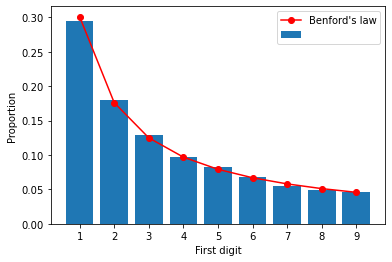

In [40]:
ben.build_hist_freq_ben(f_obs, ben.get_theoretical_freq_benford(), 1)